In [1]:
# CoinMarketCap.com
# Using Basic free account
# Check their API documentation - shows how to grab their API using the Python code below:

# Changing limit to grab the first 15 rows every update, originally 5000

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'c4e8f9e2-b398-4a01-80e3-93592fd85e62',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#Note:
# Running this block sends an HTTP GET request to CoinMarketCap's API, which uses up your key's data usage.
# With a free account, you only get a certain amount of usage per month(10000) and each call is 25
# Also, first time running, I had go into Anaconda Prompt and use "jupyter notebook --ServerApp.iopub_data_rate_limit=1e10"
# Then I had to open the new localhost window and it worked.

{'status': {'timestamp': '2024-10-09T21:28:38.486Z', 'error_code': 0, 'error_message': None, 'elapsed': 26, 'credit_count': 1, 'notice': None, 'total_count': 9861}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11771, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [3]:
type(data)

dict

In [5]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
df = pd.json_normalize(data['data'])
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,11771,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.976543e+07,1.976543e+07,False,NaN,1,NaN,NaN,None,2024-10-09T21:27:00.000Z,60662.731736,2.737421e+10,-8.0502,-0.312447,-2.799787,-0.153550,5.142770,0.724372,5.748215,1.199025e+12,56.6693,1.273917e+12,None,2024-10-09T21:27:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,9393,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.203800e+08,1.203800e+08,True,NaN,2,NaN,NaN,None,2024-10-09T21:26:00.000Z,2370.419384,1.481629e+10,0.4372,-1.366846,-3.082934,0.006604,0.374415,-9.391674,-23.668680,2.853511e+11,13.5035,2.853511e+11,None,2024-10-09T21:26:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether USDt,USDT,tether,99920,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.198482e+11,1.213636e+11,True,NaN,3,NaN,NaN,None,2024-10-09T21:25:00.000Z,0.999171,5.153204e+10,-6.8330,-0.003878,-0.008853,-0.056590,-0.103632,-0.105795,-0.101778,1.197488e+11,5.6668,1.212630e+11,None,2024-10-09T21:25:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,1839,BNB,BNB,bnb,2257,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459322e+08,1.459322e+08,False,NaN,4,NaN,NaN,None,2024-10-09T21:26:00.000Z,569.507441,1.920968e+09,-10.9567,-0.092949,-2.336512,4.946931,9.148375,8.694287,8.592421,8.310947e+10,3.9317,8.310947e+10,None,2024-10-09T21:26:00.000Z,NaN,NaN,NaN,NaN,NaN
4,5426,Solana,SOL,solana,752,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.693753e+08,5.862797e+08,True,NaN,5,NaN,NaN,None,2024-10-09T21:25:00.000Z,139.760550,1.678406e+09,-11.2365,0.150567,-3.194647,-0.418722,3.388295,-9.869777,2.134284,6.560015e+10,3.1034,8.193877e+10,None,2024-10-09T21:25:00.000Z,NaN,NaN,NaN,NaN,NaN
5,3408,USDC,USDC,usd-coin,22360,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.479094e+10,3.479094e+10,False,NaN,6,NaN,NaN,None,2024-10-09T21:25:00.000Z,0.999955,5.473743e+09,-13.3540,0.003037,0.013796,0.001427,-0.002236,-0.004172,-0.006781,3.478937e+10,1.6463,3.478937e+10,None,2024-10-09T21:25:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
6,52,XRP,XRP,xrp,1403,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.664506e+10,9.998714e+10,False,NaN,7,NaN,NaN,None,2024-10-09T21:26:00.000Z,0.524062,8.547298e+08,-11.5161,-0.544970,-1.505418,-5.544973,-3.087553,-11.684652,17.251439,2.968553e+10,1.4048,5.240621e+10,None,2024-10-09T21:26:00.000Z,NaN,NaN,NaN,NaN,NaN
7,74,Dogecoin,DOGE,dogecoin,1079,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.462995e+11,1.462995e+11,True,NaN,8,NaN,NaN,None,2024-10-09T21:26:00.000Z,0.107398,6.601227e+08,-0.8820,-0.410988,-0.104322,2.700490,3.228227,1.772109,0.732994,1.571233e+10,0.7426,1.571233e+10,None,2024-10-09T21:26:00.000Z,NaN,NaN,NaN,NaN,NaN
8,1958,TRON,TRX,tron,1046,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,8.656583e+10,8.656586e+10,True,NaN,9,7.165966e+10,1.147494e+10,None,2024-10-09T21:26:00.000Z,0.160131,3.235650e+08,-14.3881,-0.217956,0.167518,3.689017,3.732269,23.661136,18.500020,1.386188e+10,0.6552,1.386188e+10,None,2024-10-09T21:26:00.000Z,

In [9]:
# appends a column called "timestamp" to the end of the dataset with the current time
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11771,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.976543e+07,1.976543e+07,False,NaN,1,NaN,NaN,None,2024-10-09T21:27:00.000Z,60662.731736,2.737421e+10,-8.0502,-0.312447,-2.799787,-0.153550,5.142770,0.724372,5.748215,1.199025e+12,56.6693,1.273917e+12,None,2024-10-09T21:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-09 15:29:20.358964
1,1027,Ethereum,ETH,ethereum,9393,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.203800e+08,1.203800e+08,True,NaN,2,NaN,NaN,None,2024-10-09T21:26:00.000Z,2370.419384,1.481629e+10,0.4372,-1.366846,-3.082934,0.006604,0.374415,-9.391674,-23.668680,2.853511e+11,13.5035,2.853511e+11,None,2024-10-09T21:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-09 15:29:20.358964
2,825,Tether USDt,USDT,tether,99920,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.198482e+11,1.213636e+11,True,NaN,3,NaN,NaN,None,2024-10-09T21:25:00.000Z,0.999171,5.153204e+10,-6.8330,-0.003878,-0.008853,-0.056590,-0.103632,-0.105795,-0.101778,1.197488e+11,5.6668,1.212630e+11,None,2024-10-09T21:25:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-09 15:29:20.358964
3,1839,BNB,BNB,bnb,2257,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459322e+08,1.459322e+08,False,NaN,4,NaN,NaN,None,2024-10-09T21:26:00.000Z,569.507441,1.920968e+09,-10.9567,-0.092949,-2.336512,4.946931,9.148375,8.694287,8.592421,8.310947e+10,3.9317,8.310947e+10,None,2024-10-09T21:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-09 15:29:20.358964
4,5426,Solana,SOL,solana,752,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.693753e+08,5.862797e+08,True,NaN,5,NaN,NaN,None,2024-10-09T21:25:00.000Z,139.760550,1.678406e+09,-11.2365,0.150567,-3.194647,-0.418722,3.388295,-9.869777,2.134284,6.560015e+10,3.1034,8.193877e+10,None,2024-10-09T21:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-09 15:29:20.358964
5,3408,USDC,USDC,usd-coin,22360,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.479094e+10,3.479094e+10,False,NaN,6,NaN,NaN,None,2024-10-09T21:25:00.000Z,0.999955,5.473743e+09,-13.3540,0.003037,0.013796,0.001427,-0.002236,-0.004172,-0.006781,3.478937e+10,1.6463,3.478937e+10,None,2024-10-09T21:25:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-09 15:29:20.358964
6,52,XRP,XRP,xrp,1403,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.664506e+10,9.998714e+10,False,NaN,7,NaN,NaN,None,2024-10-09T21:26:00.000Z,0.524062,8.547298e+08,-11.5161,-0.544970,-1.505418,-5.544973,-3.087553,-11.684652,17.251439,2.968553e+10,1.4048,5.240621e+10,None,2024-10-09T21:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-09 15:29:20.358964
7,74,Dogecoin,DOGE,dogecoin,1079,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.462995e+11,1.462995e+11,True,NaN,8,NaN,NaN,None,2024-10-09T21:26:00.000Z,0.107398,6.601227e+08,-0.8820,-0.410988,-0.104322,2.700490,3.228227,1.772109,0.732994,1.571233e+10,0.7426,1.571233e+10,None,2024-10-09T21:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-09 15:29:20.358964
8,1958,TRON,TRX,tron,1046,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,8.656583e+10,8.656

In [27]:
# Now we're going to write the code to automate this process

In [11]:
def api_runner():
    # declare dataframe as a global variable
    global df
    
    # Make the API get call
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',     # changing limit to 15 to show grabbing the first 15 rows and then appending on next call
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'c4e8f9e2-b398-4a01-80e3-93592fd85e62',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    # Normalize the json data into a new dataframe, add the timestamp column, and apply as the original dataframe
    
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    #df = df.append(df2) -> is now pandas.concat
    df_append = pd.DataFrame(df2)
    df = pd.concat([df, df_append])

    if not os.path.isfile(r'C:\Users\jalva\Projects\Data Analyst\Tutorials\Amazon Web Scraping using Python\Automated API collection\API.csv'):
        df.to_csv(r'C:\Users\jalva\Projects\Data Analyst\Tutorials\Amazon Web Scraping using Python\Automated API collection\API.csv', header = 'column_names')
    else:
        # if the file already exists, append with the new data using mode = 'a' and no headers
        df.to_csv(r'C:\Users\jalva\Projects\Data Analyst\Tutorials\Amazon Web Scraping using Python\Automated API collection\API.csv', mode = 'a', header = False)

In [13]:
# There are other ways to automate python scripts, but this is cheaper

import os
from time import time
from time import sleep

# 10000 monthly usage / 30 days = 333.333 usage per day
for i in range(333):
    # call the api runner function
    api_runner()
    # print a message to let us know it ran every minute
    print("API Runner completed successfully")
    # sleep
    sleep(60)  # sleep for one minute
exit()

{'status': {'timestamp': '2024-10-09T21:29:53.722Z', 'error_code': 0, 'error_message': None, 'elapsed': 24, 'credit_count': 1, 'notice': None, 'total_count': 9861}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11771, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

KeyboardInterrupt: 

In [16]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11771,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.976543e+07,1.976543e+07,False,NaN,1,NaN,NaN,None,2024-10-09T21:27:00.000Z,60662.731736,2.737421e+10,-8.0502,-0.312447,-2.799787,-0.153550,5.142770,0.724372,5.748215,1.199025e+12,56.6693,1.273917e+12,None,2024-10-09T21:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-09 15:29:20.358964
1,1027,Ethereum,ETH,ethereum,9393,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.203800e+08,1.203800e+08,True,NaN,2,NaN,NaN,None,2024-10-09T21:26:00.000Z,2370.419384,1.481629e+10,0.4372,-1.366846,-3.082934,0.006604,0.374415,-9.391674,-23.668680,2.853511e+11,13.5035,2.853511e+11,None,2024-10-09T21:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-09 15:29:20.358964
2,825,Tether USDt,USDT,tether,99920,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.198482e+11,1.213636e+11,True,NaN,3,NaN,NaN,None,2024-10-09T21:25:00.000Z,0.999171,5.153204e+10,-6.8330,-0.003878,-0.008853,-0.056590,-0.103632,-0.105795,-0.101778,1.197488e+11,5.6668,1.212630e+11,None,2024-10-09T21:25:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-09 15:29:20.358964
3,1839,BNB,BNB,bnb,2257,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459322e+08,1.459322e+08,False,NaN,4,NaN,NaN,None,2024-10-09T21:26:00.000Z,569.507441,1.920968e+09,-10.9567,-0.092949,-2.336512,4.946931,9.148375,8.694287,8.592421,8.310947e+10,3.9317,8.310947e+10,None,2024-10-09T21:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-09 15:29:20.358964
4,5426,Solana,SOL,solana,752,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.693753e+08,5.862797e+08,True,NaN,5,NaN,NaN,None,2024-10-09T21:25:00.000Z,139.760550,1.678406e+09,-11.2365,0.150567,-3.194647,-0.418722,3.388295,-9.869777,2.134284,6.560015e+10,3.1034,8.193877e+10,None,2024-10-09T21:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-09 15:29:20.358964
5,3408,USDC,USDC,usd-coin,22360,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.479094e+10,3.479094e+10,False,NaN,6,NaN,NaN,None,2024-10-09T21:25:00.000Z,0.999955,5.473743e+09,-13.3540,0.003037,0.013796,0.001427,-0.002236,-0.004172,-0.006781,3.478937e+10,1.6463,3.478937e+10,None,2024-10-09T21:25:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-09 15:29:20.358964
6,52,XRP,XRP,xrp,1403,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.664506e+10,9.998714e+10,False,NaN,7,NaN,NaN,None,2024-10-09T21:26:00.000Z,0.524062,8.547298e+08,-11.5161,-0.544970,-1.505418,-5.544973,-3.087553,-11.684652,17.251439,2.968553e+10,1.4048,5.240621e+10,None,2024-10-09T21:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-09 15:29:20.358964
7,74,Dogecoin,DOGE,dogecoin,1079,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.462995e+11,1.462995e+11,True,NaN,8,NaN,NaN,None,2024-10-09T21:26:00.000Z,0.107398,6.601227e+08,-0.8820,-0.410988,-0.104322,2.700490,3.228227,1.772109,0.732994,1.571233e+10,0.7426,1.571233e+10,None,2024-10-09T21:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-09 15:29:20.358964
8,1958,TRON,TRX,tron,1046,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,8.656583e+10,8.656

In [20]:
# remove scientific notation
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [22]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11771,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19765428.00000,19765428.00000,False,NaN,1,NaN,NaN,None,2024-10-09T21:27:00.000Z,60662.73174,27374214179.92416,-8.05020,-0.31245,-2.79979,-0.15355,5.14277,0.72437,5.74821,1199024856419.62256,56.66930,1273917366464.91992,None,2024-10-09T21:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-09 15:29:20.358964
1,1027,Ethereum,ETH,ethereum,9393,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120379987.67888,120379987.67888,True,NaN,2,NaN,NaN,None,2024-10-09T21:26:00.000Z,2370.41938,14816287289.09485,0.43720,-1.36685,-3.08293,0.00660,0.37441,-9.39167,-23.66868,285351056194.35602,13.50350,285351056194.35999,None,2024-10-09T21:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-09 15:29:20.358964
2,825,Tether USDt,USDT,tether,99920,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,119848153356.52142,121363587342.99321,True,NaN,3,NaN,NaN,None,2024-10-09T21:25:00.000Z,0.99917,51532036525.04422,-6.83300,-0.00388,-0.00885,-0.05659,-0.10363,-0.10580,-0.10178,119748806420.86339,5.66680,121262984203.39000,None,2024-10-09T21:25:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-09 15:29:20.358964
3,1839,BNB,BNB,bnb,2257,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145932193.28684,145932193.28684,False,NaN,4,NaN,NaN,None,2024-10-09T21:26:00.000Z,569.50744,1920967508.01170,-10.95670,-0.09295,-2.33651,4.94693,9.14837,8.69429,8.59242,83109469930.88150,3.93170,83109469930.88000,None,2024-10-09T21:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-09 15:29:20.358964
4,5426,Solana,SOL,solana,752,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,469375292.37343,586279664.52076,True,NaN,5,NaN,NaN,None,2024-10-09T21:25:00.000Z,139.76055,1678406268.00496,-11.23650,0.15057,-3.19465,-0.41872,3.38829,-9.86978,2.13428,65600148919.49792,3.10340,81938768243.55000,None,2024-10-09T21:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-09 15:29:20.358964
5,3408,USDC,USDC,usd-coin,22360,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,34790939977.52059,34790939977.52059,False,NaN,6,NaN,NaN,None,2024-10-09T21:25:00.000Z,0.99995,5473743490.77211,-13.35400,0.00304,0.01380,0.00143,-0.00224,-0.00417,-0.00678,34789372571.45927,1.64630,34789372571.46000,None,2024-10-09T21:25:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-09 15:29:20.358964
6,52,XRP,XRP,xrp,1403,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,56645058199.00000,99987139355.00000,False,NaN,7,NaN,NaN,None,2024-10-09T21:26:00.000Z,0.52406,854729783.35607,-11.51610,-0.54497,-1.50542,-5.54497,-3.08755,-11.68465,17.25144,29685529315.78952,1.40480,52406212050.31000,None,2024-10-09T21:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-09 15:29:20.358964
7,74,Dogecoin,DOGE,dogecoin,1079,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,146299506383.70520,146299506383.70520,True,NaN,8,NaN,NaN,None,2024-10-09T21:26:00.000Z,0.10740,660122739.43522,-0.88200,-0.41099,-0.10432,2.70049,3.22823,1.77211,0.73299,15712334952.02417,0.74260,15712334952.02000,None,2024-10-09T21:26:00.000Z,NaN,NaN,N

In [24]:
df3 = df.groupby('name', sort=False)[["quote.USD.percent_change_1h", "quote.USD.percent_change_24h", "quote.USD.percent_change_7d", "quote.USD.percent_change_30d", "quote.USD.percent_change_60d", "quote.USD.percent_change_90d"]].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.29017,-2.76073,-0.13188,5.14619,0.74923,5.77783
Ethereum,-1.34447,-3.09604,-0.00155,0.12560,-9.37692,-23.66244
Tether USDt,-0.00254,-0.00350,-0.05329,-0.09939,-0.11121,-0.08390
BNB,-0.00249,-2.33443,4.95335,9.11760,8.70987,8.69330
Solana,0.29079,-3.13101,-0.35482,3.29191,-9.78181,2.29862
USDC,-0.00144,0.01314,0.00334,0.00014,-0.01871,0.00146
XRP,-0.42372,-1.44484,-5.55370,-3.06796,-11.67721,17.42647
Dogecoin,-0.27488,-0.14414,2.68952,3.14052,1.79103,0.83987
TRON,-0.18122,0.18371,3.69331,3.76605,23.64969,18.57710


In [26]:
# we're going to try making the columns be the rows, so we'll try with a stack
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.29017
              quote.USD.percent_change_24h    -2.76073
              quote.USD.percent_change_7d     -0.13188
              quote.USD.percent_change_30d     5.14619
              quote.USD.percent_change_60d     0.74923
              quote.USD.percent_change_90d     5.77783
Ethereum      quote.USD.percent_change_1h     -1.34447
              quote.USD.percent_change_24h    -3.09604
              quote.USD.percent_change_7d     -0.00155
              quote.USD.percent_change_30d     0.12560
              quote.USD.percent_change_60d    -9.37692
              quote.USD.percent_change_90d   -23.66244
Tether USDt   quote.USD.percent_change_1h     -0.00254
              quote.USD.percent_change_24h    -0.00350
              quote.USD.percent_change_7d     -0.05329
              quote.USD.percent_change_30d    -0.09939
              quote.USD.percent_change_60d    -0.11121
              quote.US

In [28]:
type(df3)

pandas.core.frame.DataFrame

In [30]:
type(df4)

pandas.core.series.Series

In [32]:
df5 = df4.to_frame(name = 'values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.29017
             quote.USD.percent_change_24h  -2.76073
             quote.USD.percent_change_7d   -0.13188
             quote.USD.percent_change_30d   5.14619
             quote.USD.percent_change_60d   0.74923
             quote.USD.percent_change_90d   5.77783
Ethereum     quote.USD.percent_change_1h   -1.34447
             quote.USD.percent_change_24h  -3.09604
             quote.USD.percent_change_7d   -0.00155
             quote.USD.percent_change_30d   0.12560
             quote.USD.percent_change_60d  -9.37692
             quote.USD.percent_change_90d -23.66244
Tether USDt  quote.USD.percent_change_1h   -0.00254
             quote.USD.percent_change_24h  -0.00350
             quote.USD.percent_change_7d   -0.05329
             quote.USD.percent_change_30d  -0.09939
             quote.USD.percent_change_60d  -0.11121
             quote.USD.percent_change_90d  -0.08390
BNB          quote.USD.percent_change_1h   -0.00249
             quote.USD.percent_change_24h  -2.33443
             quote.USD.percent_change_7d    4.95335
             quote.USD.percent_change_30d   9.11760
             quote.USD.percent_change_60d   8.70987
             quote.USD.percent_change_90d   8.69330
Solana       quote.USD.percent_change_1h    0.29079
             quote.USD.percent_change_24h  -3.13101
             quote.USD.percent_change_7d   -0.35482
             quote.USD.percent_change_30d   3.29191
             quote.USD.percent_change_60d  -9.78181
             quote.USD.percent_change_90d   2.29862
USDC         quote.USD.percent_change_1h   -0.00144
             quote.USD.percent_change_24h   0.01314
             quote.USD.percent_change_7d    0.00334
             quote.USD.percent_change_30d   0.00014
             quote.USD.percent_change_60d  -0.01871
             quote.USD.percent_change_90d   0.00146
XRP          quote.USD.percent_change_1h   -0.42372
             quote.USD.percent_change_24h  -1.44484
             quote.USD.percent_change_7d   -5.55370
             quote.USD.percent_change_30d  -3.06796
             quote.USD.percent_change_60d -11.67721
             quote.USD.percent_change_90d  17.42647
Dogecoin     quote.USD.percent_change_1h   -0.27488
             quote.USD.percent_change_24h  -0.14414
             quote.USD.percent_change_7d    2.68952
             quote.USD.percent_change_30d   3.14052
             quote.USD.percent_change_60d   1.79103
             quote.USD.percent_change_90d   0.83987
TRON         quote.USD.percent_change_1h   -0.18122
             quote.USD.percent_change_24h   0.18371
             quote.USD.percent_change_7d    3.69331
             quote.USD.percent_change_30d   3.76605
             quote.USD.percent_change_60d  23.64969
             quote.USD.percent_change_90d  18.57710
Toncoin      quote.USD.percent_change_1h   -0.19625
             quote.USD.percent_change_24h  -3.34979
             quote.USD.percent_change_7d   -5.32911
             quote.USD.percent_change_30d  -3.03564
             quote.USD.percent_change_60d -24.59952
             quote.USD.percent_change_90d -30.52020
Cardano      quote.USD.percent_change_1h   -0.22470
             quote.USD.percent_change_24h  -2.56020
             quote.USD.percent_change_7d   -1.75053
             quote.USD.percent_change_30d  -2.87708
             quote.USD.percent_change_60d  -3.29976
             quote.USD.percent_change_90d -14.70093
Avalanche    quote.USD.percent_change_1h   -0.02196
             quote.USD.percent_change_24h  -2.56647
             quote.USD.percent_change_7d    2.16696
             quote.USD.percent_change_30d   7.41698
             quote.USD.percent_change_60d  19.03268
             quote.USD.percent_change_90d   2.90427
Shiba Inu    quote.USD.percent_change_1h    0.27639
             quote.USD.percent_change_24h  -2.49649
             quote.USD.percent_change_7d    3.84479
             quote.USD.percent_change_30d

In [38]:
df5.count()

values    90
dtype: int64

In [40]:
type(df5)

pandas.core.frame.DataFrame

In [42]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.29017
1,Bitcoin,quote.USD.percent_change_24h,-2.76073
2,Bitcoin,quote.USD.percent_change_7d,-0.13188
3,Bitcoin,quote.USD.percent_change_30d,5.14619
4,Bitcoin,quote.USD.percent_change_60d,0.74923
5,Bitcoin,quote.USD.percent_change_90d,5.77783
6,Ethereum,quote.USD.percent_change_1h,-1.34447
7,Ethereum,quote.USD.percent_change_24h,-3.09604
8,Ethereum,quote.USD.percent_change_7d,-0.00155
9,Ethereum,quote.USD.percent_change_30d,0.12560


In [66]:
df7 = df6.rename(columns = {'level_1' : 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.29017
1,Bitcoin,quote.USD.percent_change_24h,-2.76073
2,Bitcoin,quote.USD.percent_change_7d,-0.13188
3,Bitcoin,quote.USD.percent_change_30d,5.14619
4,Bitcoin,quote.USD.percent_change_60d,0.74923
5,Bitcoin,quote.USD.percent_change_90d,5.77783
6,Ethereum,quote.USD.percent_change_1h,-1.34447
7,Ethereum,quote.USD.percent_change_24h,-3.09604
8,Ethereum,quote.USD.percent_change_7d,-0.00155
9,Ethereum,quote.USD.percent_change_30d,0.12560


In [68]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'], ['1h', '24h', '7d', '30d', '60d', '90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.29017
1,Bitcoin,24h,-2.76073
2,Bitcoin,7d,-0.13188
3,Bitcoin,30d,5.14619
4,Bitcoin,60d,0.74923
5,Bitcoin,90d,5.77783
6,Ethereum,1h,-1.34447
7,Ethereum,24h,-3.09604
8,Ethereum,7d,-0.00155
9,Ethereum,30d,0.12560


In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

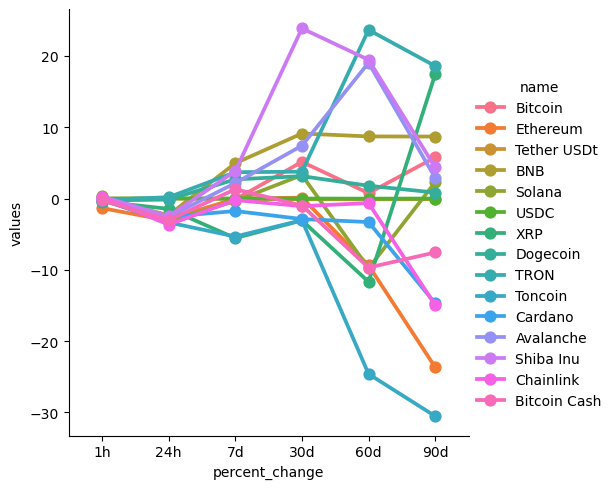

In [72]:
sns.catplot(x = 'percent_change', y = 'values', hue = 'name', data = df7, kind = 'point')

In [78]:
df8 = df[['name', 'quote.USD.price', 'timestamp']]
df8 = df8.query("name == 'Bitcoin'")
df8

,name,quote.USD.price,timestamp
0,Bitcoin,60662.73174,2024-10-09 15:29:20.358964
0,Bitcoin,60662.73174,2024-10-09 15:29:53.731255
0,Bitcoin,60715.54770,2024-10-09 15:30:53.952630
0,Bitcoin,60715.54770,2024-10-09 15:31:54.197257


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

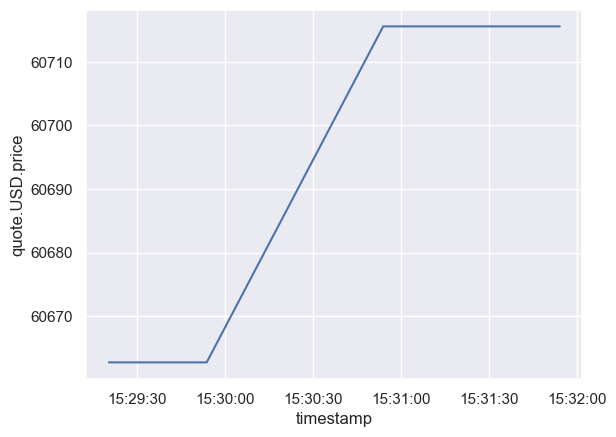

In [82]:
sns.set_theme(style = 'darkgrid')

sns.lineplot(x = 'timestamp', y = 'quote.USD.price', data = df8)